In [1]:
# Nome: Francisco Mateus dos Anjos Silva
# Matrícula: 521783
# Disciplina: Introdução à Ciência de Dados
# Trabalho 3: Algoritmos de Machine Learning

# Trabalho 3 - Algoritmos de Machine Learning:
# Predição de preços de carros

### Descrição do problema e objetivos:

#### No Trabalho 2 (trabalho passado) a ideia foi utilizar um dataset (Conjunto de dados de 100.000 carros usados no Reino Unido) que contém o nome de carros (modelo), seu preço e outros atributos de carros, e agora, nesse Trabalho 3 vamos construir modelos para predizer o preço de carros usados de acordo com suas features (ano, modelo, transmissão, quilometragem, tipo de combustível, imposto, consumo e tamanho do motor).

### Descrição do dataset:

#### Será utilizado o dataset ‘Conjunto de dados com cerca de 100 mil carros usados no Reino Unido’ (disponível em: https://www.kaggle.com/adityadesai13/used-car-dataset-ford-and-mercedes). Este conjunto de dados é composto por dados extraídos de listagens de carros usados. 100.000 anúncios que foram separados em arquivos correspondentes a cada fabricante de automóveis. 

#### Atributos:
 model: nome do modelo do carro
 
 year: ano de fabricação 
 
 price: preço
 
 transmission: transmissão
 
 mileage: quilometragem 
 
 fuelType: tipo de combustível
 
 tax: imposto sobre o carro
 
 mpg: milhas por galão de combustível
 
 engineSize: tamanho do motor 

###  Etapas
###  Trabalho 2
#### 1 - Importação dos datasets
#### 2 - Análise exploratória dos dados
###  Trabalho 3
#### 3 - Pré-processamento dos dados
#### 4 - Aplicação de modelos
#### 5 - Avaliação dos modelos

## Importação de bibliotecas

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy
import scipy.stats
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score 
from sklearn import tree, metrics
from plotnine import *

import warnings
warnings.filterwarnings('ignore')

## 1 - Importação dos datasets

In [3]:
df = pd.read_csv("datasets/audi.csv")
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0


In [4]:
df.shape[0]

10668

### Adicionando coluna de marca (brand) no dataset de cada marca:

### Audi

In [5]:
df_aud = pd.read_csv("datasets/audi.csv")
qtd_lines = df_aud.shape[0]

In [6]:
df_aud['brand'] = ("Audi," * qtd_lines).split(',')[:-1]
df_aud.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,brand
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4,Audi
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0,Audi
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4,Audi
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0,Audi
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0,Audi


### BMW

In [7]:
df_bmw = pd.read_csv("datasets/bmw.csv")
qtd_lines = df_bmw.shape[0]

In [8]:
df_bmw['brand'] = ("Bmw," * qtd_lines).split(',')[:-1]
df_bmw.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,brand
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0,Bmw
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0,Bmw
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0,Bmw
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5,Bmw
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0,Bmw


### Ford

In [9]:
df_for2 = pd.read_csv("datasets/ford.csv")
qtd_lines = df_for2.shape[0]

df_for2['brand'] = ("Ford," * qtd_lines).split(',')[:-1]
df_for2.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,brand
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0,Ford
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0,Ford
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0,Ford
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5,Ford
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0,Ford


### Hyundai

In [10]:
df_hyu = pd.read_csv("datasets/hyundi.csv")
qtd_lines = df_hyu.shape[0]

df_hyu['brand'] = ("Hyundi," * qtd_lines).split(',')[:-1]
df_hyu.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,brand
0,I20,2017,7999,Manual,17307,Petrol,145,58.9,1.2,Hyundi
1,Tucson,2016,14499,Automatic,25233,Diesel,235,43.5,2.0,Hyundi
2,Tucson,2016,11399,Manual,37877,Diesel,30,61.7,1.7,Hyundi
3,I10,2016,6499,Manual,23789,Petrol,20,60.1,1.0,Hyundi
4,IX35,2015,10199,Manual,33177,Diesel,160,51.4,2.0,Hyundi


### Mercedes

In [11]:
df_mer2 = pd.read_csv("datasets/merc.csv")
qtd_lines = df_mer2.shape[0]

df_mer2['brand'] = ("Mercesdes," * qtd_lines).split(',')[:-1]
df_mer2.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,brand
0,SLK,2005,5200,Automatic,63000,Petrol,325,32.1,1.8,Mercesdes
1,S Class,2017,34948,Automatic,27000,Hybrid,20,61.4,2.1,Mercesdes
2,SL CLASS,2016,49948,Automatic,6200,Petrol,555,28.0,5.5,Mercesdes
3,G Class,2016,61948,Automatic,16000,Petrol,325,30.4,4.0,Mercesdes
4,G Class,2016,73948,Automatic,4000,Petrol,325,30.1,4.0,Mercesdes


### Skoda

In [12]:
df_sko = pd.read_csv("datasets/skoda.csv")
qtd_lines = df_sko.shape[0]

df_sko['brand'] = ("Skoda," * qtd_lines).split(',')[:-1]
df_sko.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,brand
0,Octavia,2017,10550,Manual,25250,Petrol,150,54.3,1.4,Skoda
1,Citigo,2018,8200,Manual,1264,Petrol,145,67.3,1.0,Skoda
2,Octavia,2019,15650,Automatic,6825,Diesel,145,67.3,2.0,Skoda
3,Yeti Outdoor,2015,14000,Automatic,28431,Diesel,165,51.4,2.0,Skoda
4,Superb,2019,18350,Manual,10912,Petrol,150,40.9,1.5,Skoda


### Toyota

In [13]:
df_toy = pd.read_csv("datasets/toyota.csv")
qtd_lines = df_toy.shape[0]

df_toy['brand'] = ("Toyota," * qtd_lines).split(',')[:-1]
df_toy.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,brand
0,GT86,2016,16000,Manual,24089,Petrol,265,36.2,2.0,Toyota
1,GT86,2017,15995,Manual,18615,Petrol,145,36.2,2.0,Toyota
2,GT86,2015,13998,Manual,27469,Petrol,265,36.2,2.0,Toyota
3,GT86,2017,18998,Manual,14736,Petrol,150,36.2,2.0,Toyota
4,GT86,2017,17498,Manual,36284,Petrol,145,36.2,2.0,Toyota


### Vauxhall

In [14]:
df_vau = pd.read_csv("datasets/vauxhall.csv")
qtd_lines = df_vau.shape[0]

df_vau['brand'] = ("Vauxhall," * qtd_lines).split(',')[:-1]
df_vau.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,brand
0,Corsa,2018,7885,Manual,9876,Petrol,145,55.4,1.4,Vauxhall
1,Corsa,2019,11995,Manual,2500,Petrol,145,54.3,1.4,Vauxhall
2,Corsa,2017,9777,Automatic,9625,Petrol,145,47.9,1.4,Vauxhall
3,Corsa,2016,8500,Manual,25796,Petrol,30,55.4,1.4,Vauxhall
4,Corsa,2019,10000,Manual,3887,Petrol,145,43.5,1.4,Vauxhall


### VW

In [15]:
df_vw = pd.read_csv("datasets/vw.csv")
qtd_lines = df_vw.shape[0]

df_vw['brand'] = ("VW," * qtd_lines).split(',')[:-1]
df_vw.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,brand
0,T-Roc,2019,25000,Automatic,13904,Diesel,145,49.6,2.0,VW
1,T-Roc,2019,26883,Automatic,4562,Diesel,145,49.6,2.0,VW
2,T-Roc,2019,20000,Manual,7414,Diesel,145,50.4,2.0,VW
3,T-Roc,2019,33492,Automatic,4825,Petrol,145,32.5,2.0,VW
4,T-Roc,2019,22900,Semi-Auto,6500,Petrol,150,39.8,1.5,VW


### Concatenar os datasets em um único dataframe

In [16]:
df = pd.concat([df_aud, df_bmw, df_hyu, df_sko, df_toy, df_vau, df_vw, df_mer2, df_for2])
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,brand
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4,Audi
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0,Audi
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4,Audi
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0,Audi
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0,Audi


In [17]:
df.shape

(99187, 10)

## 2 - Análise exploratória dos dados

In [18]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,brand
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4,Audi
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0,Audi
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4,Audi
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0,Audi
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0,Audi


In [19]:
print("Número de instâncias: " + str(df.shape[0]))
print("Número de atributos: " + str(df.shape[1]))

Número de instâncias: 99187
Número de atributos: 10


In [20]:
# Verificando valores nulos
df.isna().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
brand           0
dtype: int64

### Modelos de carros que aparecem mais no dataset e que aparecem menos no dataset

In [21]:
df['model'].value_counts()

 Fiesta             6557
 Golf               4863
 Focus              4588
 C Class            3747
 Corsa              3441
                    ... 
 A2                    1
200                    1
 Ranger                1
 Escort                1
 Transit Tourneo       1
Name: model, Length: 195, dtype: int64

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99187 entries, 0 to 17964
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         99187 non-null  object 
 1   year          99187 non-null  int64  
 2   price         99187 non-null  int64  
 3   transmission  99187 non-null  object 
 4   mileage       99187 non-null  int64  
 5   fuelType      99187 non-null  object 
 6   tax           99187 non-null  int64  
 7   mpg           99187 non-null  float64
 8   engineSize    99187 non-null  float64
 9   brand         99187 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 8.3+ MB


## Medidas de Tendência Central:
### Quantidade, média, desvio padrão, valor mínimo e máximo pra cada feature

In [23]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,99187.000000,99187.000000,99187.000000,99187.000000,99187.000000,99187.000000
mean,2017.087723,16805.347656,23058.914213,120.299838,55.166825,1.663280
std,2.123934,9866.773417,21148.523721,63.150926,16.138522,0.557646
min,1970.000000,450.000000,1.000000,0.000000,0.300000,0.000000
25%,2016.000000,9999.000000,7425.000000,125.000000,47.100000,1.200000
50%,2017.000000,14495.000000,17460.000000,145.000000,54.300000,1.600000
75%,2019.000000,20870.000000,32339.000000,145.000000,62.800000,2.000000
max,2060.000000,159999.000000,323000.000000,580.000000,470.800000,6.600000


### Mediana dos preços dos carros por marca

In [24]:
print("Mediana dos preços dos carros por marca:")

brands = ['Ford', 'VW', 'Vauxhall', 'Mercesdes', 'Bmw', 'Audi', 'Toyota', 'Skoda', 'Hyundi']
for brand in brands:
    print(f"{brand}:", df.loc[df['brand'] == brand]['price'].median())

Mediana dos preços dos carros por marca:
Ford: 11291.0
VW: 15497.0
Vauxhall: 9999.0
Mercesdes: 22480.0
Bmw: 20462.0
Audi: 20200.0
Toyota: 10795.0
Skoda: 12998.0
Hyundi: 11990.0


### Desvio:

In [25]:
# Calculando a média dos preços dos carros
media_precos = df['price'].mean()
print("Média dos preços dos carros:", media_precos)

Média dos preços dos carros: 16805.347656446913


In [26]:
# Calculando o Desvio
d = df['price'].apply(lambda x: x - media_precos)
d

0       -4305.347656
1        -305.347656
2       -5805.347656
3          -5.347656
4         494.652344
            ...     
17960   -8806.347656
17961   -7806.347656
17962   -9306.347656
17963   -6806.347656
17964   -8506.347656
Name: price, Length: 99187, dtype: float64

In [27]:
d.mean()

1.6761568766227761e-09

### Desvio Absoluto Médio (ou Média do Desvio Absoluto)

In [28]:
df['price'].mad()

7096.737683542909

### Variância

In [29]:
df['price'].var()

97353217.66781962

### Desvio Padrão

In [30]:
df['price'].std()

9866.773417273735

### Tabelas de Frequência e Histogramas:

### Distribuição das features

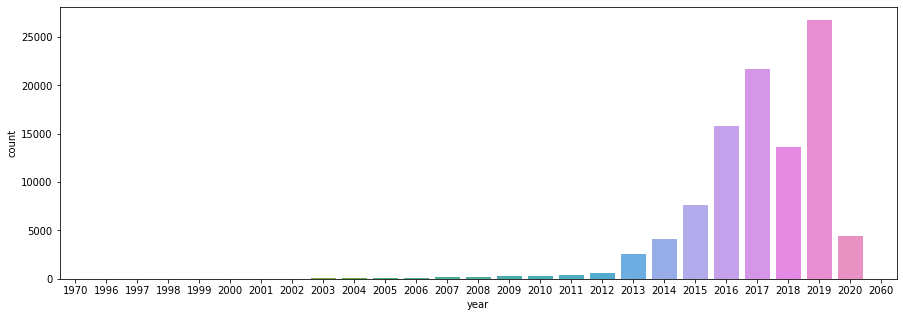

In [31]:
plt.figure(figsize=(15, 5))
sns.countplot(df["year"]);

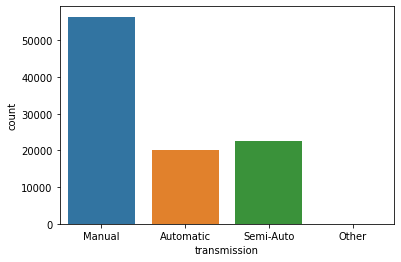

In [32]:
sns.countplot(df["transmission"]);

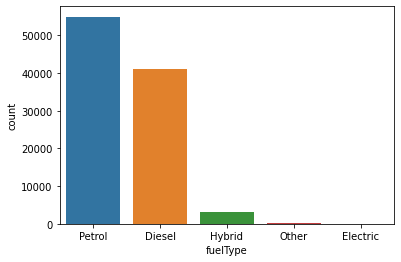

In [33]:
sns.countplot(df["fuelType"]);

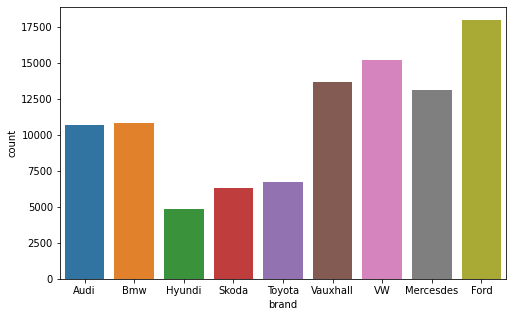

In [34]:
plt.figure(figsize=(8, 5))
sns.countplot(df["brand"]);

In [35]:
# Quantidade de carros por ano 

df['year'].value_counts()

2019    26771
2017    21733
2016    15850
2018    13664
2015     7645
2020     4465
2014     4085
2013     2603
2012      634
2011      432
2010      340
2009      278
2008      200
2007      163
2006       86
2005       69
2004       52
2003       34
2002       31
2001       20
2000        9
1998        8
1999        6
1997        4
1996        2
1970        2
2060        1
Name: year, dtype: int64

In [36]:
# Proporção de modelos no dataframe

print(df["model"].value_counts() / len(df))

 Fiesta             0.066107
 Golf               0.049029
 Focus              0.046256
 C Class            0.037777
 Corsa              0.034692
                      ...   
 A2                 0.000010
200                 0.000010
 Ranger             0.000010
 Escort             0.000010
 Transit Tourneo    0.000010
Name: model, Length: 195, dtype: float64


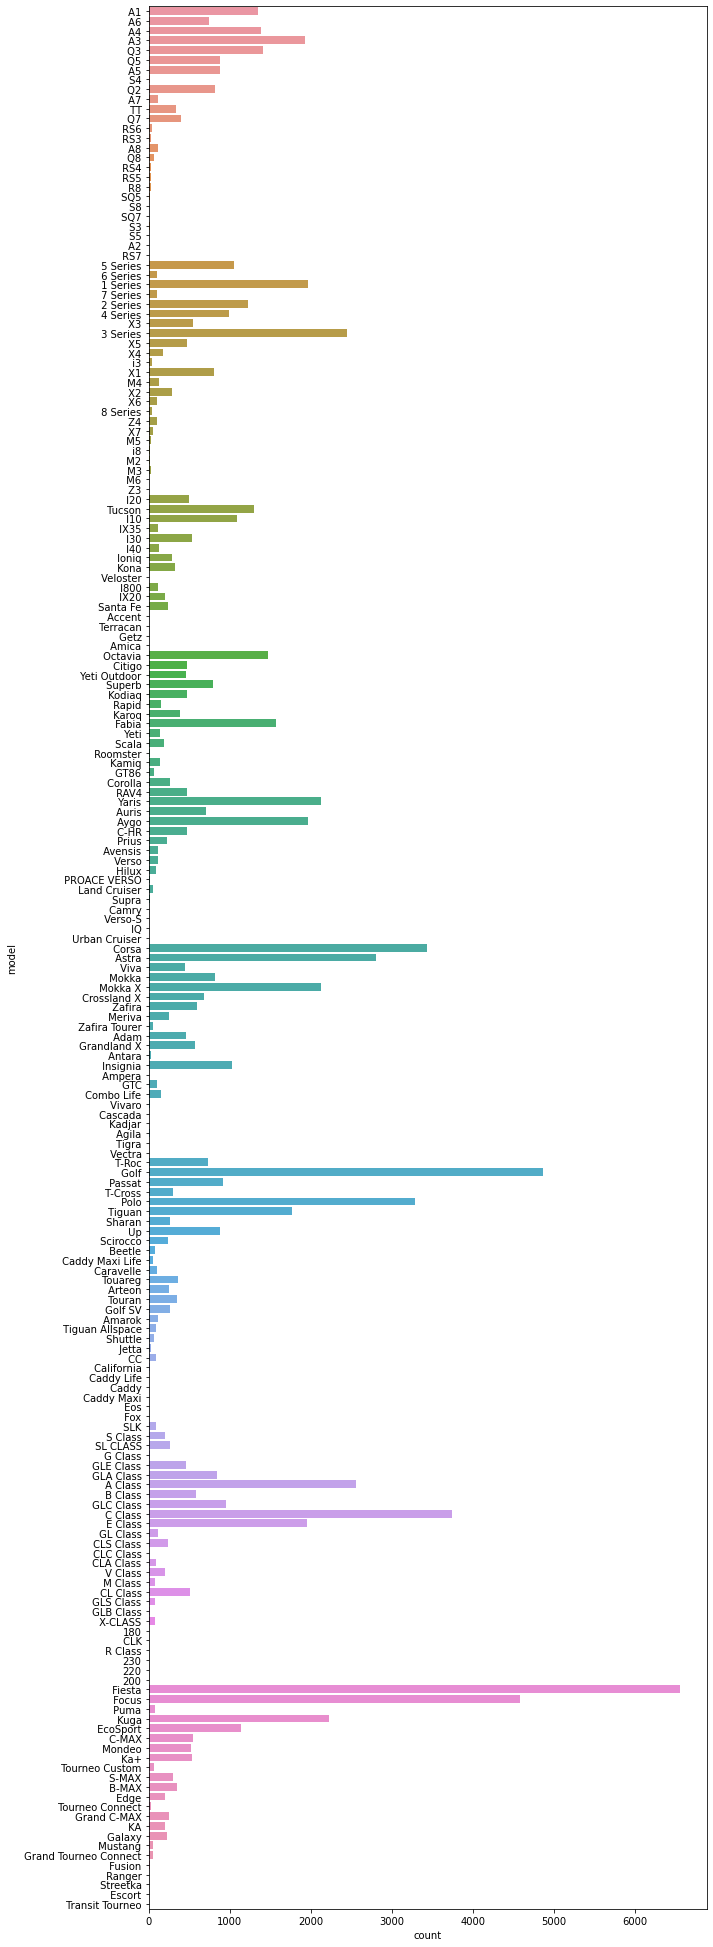

In [37]:
# Os três carros que mais têm no dataframe são: Fiesta, Golf e Focus.

plt.figure(figsize=(10, 35))
sns.countplot(y = df["model"]);

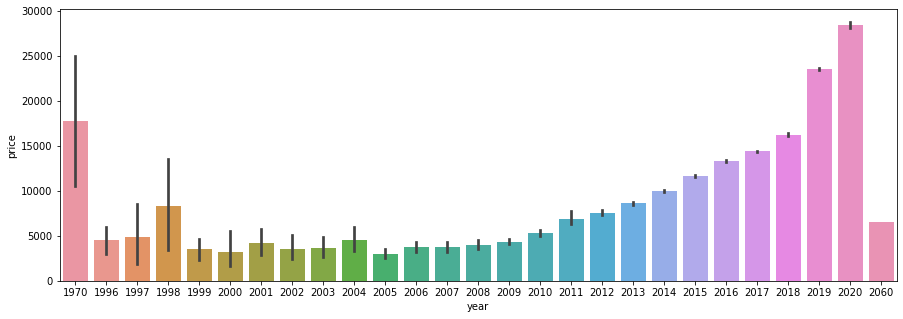

In [38]:
plt.figure(figsize=(15,5),facecolor='w') 
sns.barplot(x = df["year"], y = df["price"]);

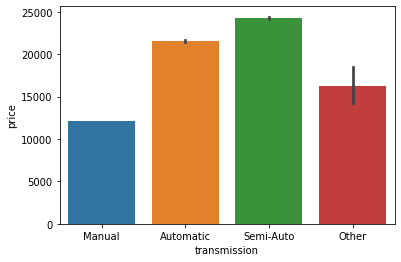

In [39]:
sns.barplot(x = df["transmission"], y = df["price"]);

### Calculando o número ideal de bins k = ⌈1 + 3,3 log10(tamanho_do_dataset)⌉

In [40]:
k = math.ceil(1 + 3.3 * math.log10(df.size))
k

21

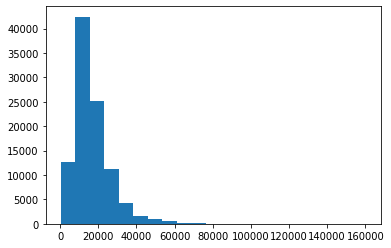

In [41]:
plt.hist(df['price'], bins=k)
plt.show()

### Raiz de n

In [42]:
k = int(math.sqrt(df.size))
k

995

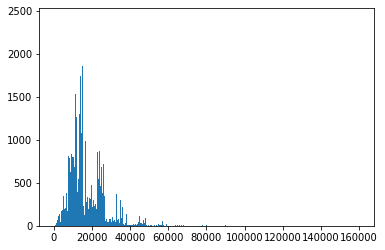

In [43]:
plt.hist(df['price'], bins=k) 
plt.show()

Raiz de n não gerou uma distribuição conhecida

## 3 - Pré-processamento dos dados

### Retirando espaços dos nomes dos modelos dos carros

In [44]:
df.query('model == " Corsa"')

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,brand
0,Corsa,2018,7885,Manual,9876,Petrol,145,55.4,1.4,Vauxhall
1,Corsa,2019,11995,Manual,2500,Petrol,145,54.3,1.4,Vauxhall
2,Corsa,2017,9777,Automatic,9625,Petrol,145,47.9,1.4,Vauxhall
3,Corsa,2016,8500,Manual,25796,Petrol,30,55.4,1.4,Vauxhall
4,Corsa,2019,10000,Manual,3887,Petrol,145,43.5,1.4,Vauxhall
...,...,...,...,...,...,...,...,...,...,...
3436,Corsa,2019,9585,Manual,13437,Petrol,145,43.5,1.4,Vauxhall
3437,Corsa,2017,9675,Manual,11384,Petrol,145,49.6,1.4,Vauxhall
3438,Corsa,2015,9999,Automatic,8390,Petrol,140,47.9,1.4,Vauxhall
3439,Corsa,2019,11395,Manual,7000,Petrol,145,43.5,1.4,Vauxhall


In [45]:
# Retirar os espaços das strings (' Corsa' -> 'Corsa') e colocar em Captalize 
df['model'] = df['model'].str.strip()
df['model']

0            A1
1            A6
2            A1
3            A4
4            A3
          ...  
17960    Fiesta
17961     B-MAX
17962     B-MAX
17963     Focus
17964        KA
Name: model, Length: 99187, dtype: object

In [46]:
df.query('model == " Corsa"')

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,brand


In [47]:
df.query('model == "Corsa"')

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,brand
0,Corsa,2018,7885,Manual,9876,Petrol,145,55.4,1.4,Vauxhall
1,Corsa,2019,11995,Manual,2500,Petrol,145,54.3,1.4,Vauxhall
2,Corsa,2017,9777,Automatic,9625,Petrol,145,47.9,1.4,Vauxhall
3,Corsa,2016,8500,Manual,25796,Petrol,30,55.4,1.4,Vauxhall
4,Corsa,2019,10000,Manual,3887,Petrol,145,43.5,1.4,Vauxhall
...,...,...,...,...,...,...,...,...,...,...
3436,Corsa,2019,9585,Manual,13437,Petrol,145,43.5,1.4,Vauxhall
3437,Corsa,2017,9675,Manual,11384,Petrol,145,49.6,1.4,Vauxhall
3438,Corsa,2015,9999,Automatic,8390,Petrol,140,47.9,1.4,Vauxhall
3439,Corsa,2019,11395,Manual,7000,Petrol,145,43.5,1.4,Vauxhall


### Removendo outliers

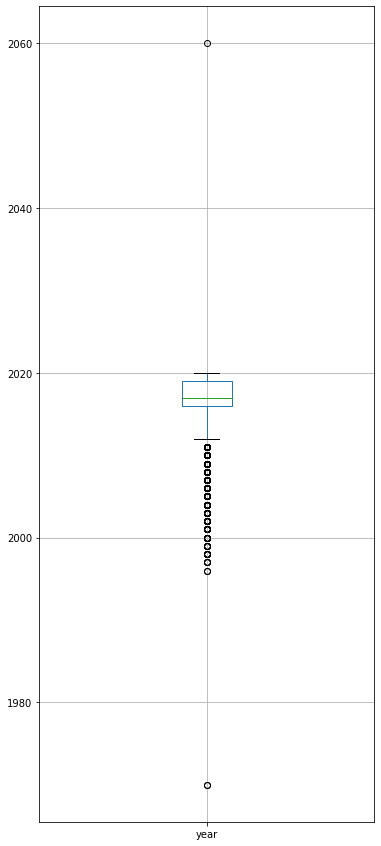

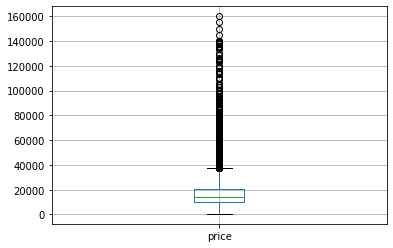

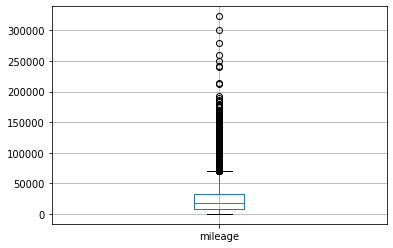

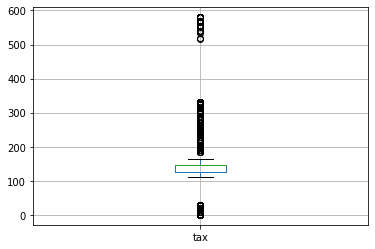

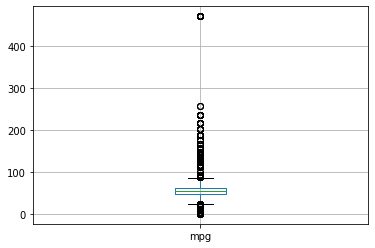

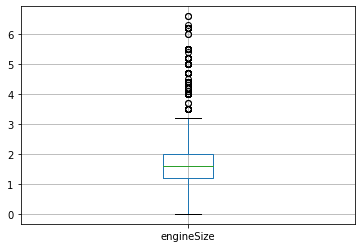

In [48]:
cols_show = ['year', 'price', 'mileage', 'tax', 'mpg', 'engineSize',]

plt.figure(figsize=(6, 15))
for col in cols_show:
    df.boxplot(column=col);
    plt.show()

In [49]:
df.query('year == 2060')

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,brand
17726,Fiesta,2060,6495,Automatic,54807,Petrol,205,42.8,1.4,Ford


In [50]:
# Excluir linha com ano 2060
df.drop(index=17726, inplace=True)

In [51]:
df.query('year == 2060')

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,brand


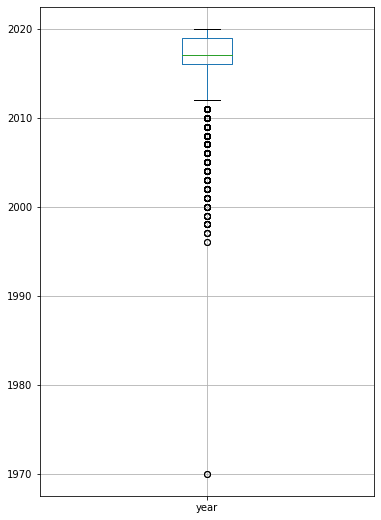

In [52]:
plt.figure(figsize=(6, 9))
df.boxplot(column='year');
plt.show()

In [53]:
df.year.describe()

count    99186.000000
mean      2017.087291
std          2.119570
min       1970.000000
25%       2016.000000
50%       2017.000000
75%       2019.000000
max       2020.000000
Name: year, dtype: float64

In [54]:
df.query('year == 2020')

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,brand
198,Q7,2020,62985,Semi-Auto,10,Diesel,145,33.2,3.0,Audi
220,Q5,2020,37985,Semi-Auto,10,Petrol,145,32.1,2.0,Audi
223,Q5,2020,47895,Semi-Auto,10,Petrol,145,30.7,2.0,Audi
224,A4,2020,31985,Semi-Auto,10,Petrol,145,42.2,2.0,Audi
316,Q7,2020,82995,Semi-Auto,826,Diesel,145,29.4,4.0,Audi
...,...,...,...,...,...,...,...,...,...,...
17902,Fiesta,2020,16999,Manual,1963,Petrol,145,58.9,1.0,Ford
17903,Focus,2020,24999,Manual,4900,Petrol,145,34.5,2.3,Ford
17939,Fiesta,2020,15799,Manual,120,Petrol,150,58.9,1.0,Ford
17940,Puma,2020,21999,Manual,1879,Petrol,145,50.4,1.0,Ford


In [55]:
df.query('year == 2010')

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,brand
7415,A5,2010,9495,Manual,76000,Petrol,235,38.7,2.0,Audi
7425,Q5,2010,11995,Automatic,54800,Petrol,300,33.2,2.0,Audi
7426,A3,2010,5495,Manual,106000,Diesel,30,64.2,2.0,Audi
7436,A6,2010,6995,Manual,79960,Diesel,160,49.6,2.0,Audi
7453,A3,2010,5495,Manual,64800,Petrol,200,40.9,1.6,Audi
...,...,...,...,...,...,...,...,...,...,...
17454,Fiesta,2010,3200,Manual,68700,Diesel,20,67.3,1.4,Ford
17484,Fiesta,2010,2690,Manual,109000,Diesel,0,76.3,1.6,Ford
17485,Mondeo,2010,2890,Manual,108000,Diesel,200,48.7,1.8,Ford
17731,Fiesta,2010,5995,Automatic,55000,Petrol,195,42.8,1.4,Ford


In [56]:
df.shape

(99186, 10)

In [57]:
df.query('year <= 2010')

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,brand
7403,S4,2004,6990,Automatic,88024,Petrol,325,22.4,4.2,Audi
7404,A3,2009,2490,Manual,152034,Diesel,150,55.4,1.9,Audi
7414,A3,2009,4495,Manual,92000,Petrol,200,40.9,1.6,Audi
7415,A5,2010,9495,Manual,76000,Petrol,235,38.7,2.0,Audi
7416,A3,2009,5995,Manual,82000,Petrol,235,39.2,2.0,Audi
...,...,...,...,...,...,...,...,...,...,...
17757,Fusion,2010,2395,Manual,77000,Diesel,30,62.8,1.4,Ford
17758,Focus,2006,2495,Automatic,70730,Petrol,260,36.7,1.6,Ford
17760,C-MAX,2007,2695,Manual,82000,Petrol,235,39.8,1.8,Ford
17761,Focus,2005,2495,Automatic,87908,Petrol,265,36.7,1.6,Ford


Vamos excluir as instâncias que a quantidade de modelos com ano específico é menor que 10% da quantidade de modelos com ano 2020 (ano que tem mais modelos).

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99186 entries, 0 to 17964
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         99186 non-null  object 
 1   year          99186 non-null  int64  
 2   price         99186 non-null  int64  
 3   transmission  99186 non-null  object 
 4   mileage       99186 non-null  int64  
 5   fuelType      99186 non-null  object 
 6   tax           99186 non-null  int64  
 7   mpg           99186 non-null  float64
 8   engineSize    99186 non-null  float64
 9   brand         99186 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 8.3+ MB


In [59]:
df.shape 

(99186, 10)

In [60]:
df.drop(df[df.year <= 2010].index, inplace=True)

In [61]:
df.shape

(92413, 10)

Vamos excluir as instâncias que tem price (preço) maior que 140000, com base no gráfico de outliers.

In [62]:
df.drop(df[df.price > 140000].index, inplace=True)

Vamos excluir as instâncias que tem mileage (quilometragem) maior que 200000 milhas, com base no gráfico de outliers.

In [63]:
df.drop(df[df.mileage > 200000].index, inplace=True)

Vamos excluir as instâncias que tem mpg (milhas por galão) maior que 300, com base no gráfico de outliers.

In [64]:
df.drop(df[df.mpg > 300].index, inplace=True)

In [65]:
df.shape

(92044, 10)

### Exportando dataframe do pandas para CSV

In [66]:
df.to_csv('df_clean_cars.csv', index=False, encoding='utf-8')

### Transformando features categóricas em númericas

In [67]:
df2 = df

In [68]:
columns = ['model', 'transmission', 'fuelType', 'brand']

In [69]:
classle = LabelEncoder()
for feature in columns:
    df2[feature] = classle.fit_transform(df2[feature].values)

In [70]:
df2.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,brand
1,16,2016,16500,0,36203,0,20,64.2,2.0,0
2,12,2016,11000,1,29946,4,30,55.4,1.4,0
3,14,2017,16800,0,25952,0,145,67.3,2.0,0
4,13,2019,17300,1,1998,4,145,49.6,1.0,0
6,16,2016,13250,0,76788,0,30,61.4,2.0,0


## Mais análise exploratória dos dados

### Analisando correlação das features

In [71]:
correlation = df.corr()

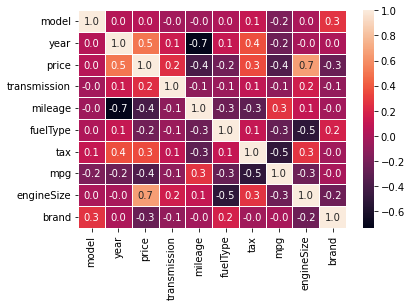

In [72]:
# plot da matriz de correlação

plot = sns.heatmap(correlation, annot = True, fmt=".1f", linewidths=.6);
plot;

Podemos observar que as features que têm FORTE correlação sao year e mileage (-0.7), price e engineSize (0.7).

### Teste de Normalidade

In [73]:
# Dataframe somente com os dados da coluna 'price'
df3 = df2.copy()

price = df3['price']

df4 = pd.DataFrame(data=price)
df4.head(3)

,price
1,16500
2,11000
3,16800


In [74]:
# Renomeando coluna 'price' para '0'
df4.rename(columns = {'price': 0}, inplace = True)

In [75]:
df4.head(3)

,0
1,16500
2,11000
3,16800


In [76]:
# Função automatizada que checa normalidade dos dados

def check_normality(Data_df):
    
    # Generating absolute frequency
    table_df = Data_df.groupby([0]).size().reset_index(name='Fabs')
    
    # Generating cumulative frequency
    table_df['Fac'] = table_df['Fabs'].cumsum()
    
    # Computing fractionary column: cumulative frequency by element over total cumulative frequency
    table_df['Frac'] = table_df['Fac']/table_df['Fac'].max()
    
    # Computing z-score
    mean = Data_df.mean()
    std = Data_df.std()
    table_df['Zi'] = table_df.iloc[:, 0].apply(lambda x: (x - mean)/std)
    
    import scipy.special as scsp
    def zScoreToPvalue(z):
        # Retornar p-value a partir do z-score
        return 0.5 * (1 + scsp.erf(z / np.sqrt(2)))
    
    # Computing expected value according to p-value
    table_df['FracEsp'] = table_df['Zi'].apply(lambda x: zScoreToPvalue(x))
    
    # Computing D-negative and D-positive
    table_df['D_neg'] = abs(table_df['FracEsp']-table_df['Frac'])
    
    table_df['D_pos'] = 0
    for i in range(table_df['Frac'].shape[0]):
        if i > 0:
            table_df.iloc[i, table_df.columns.get_loc("D_pos")] = table_df['FracEsp'].iloc[i] - table_df['Frac'].iloc[i-1]
        else:
            table_df.iloc[i, table_df.columns.get_loc("D_pos")] = table_df['FracEsp'].iloc[i]
    
    # Retrieving the maximum D
    D = ( table_df[['D_neg','D_pos']].max() ).max()
    
    from scipy.stats import ksone
    def ks_critical_value(n_trials, alpha):
        return ksone.ppf(1-alpha/2, n_trials)
    
    # Retrieving p-value
    p_value = ks_critical_value(Data_df.shape[0], 0.05)
    
    # Computing result
    print(table_df)
    print("\n")
    if D < p_value:
        print('Os dados seguem uma distribuição normal.')
    else:
        print('Os dados não seguem uma distribuição normal.')

In [77]:
check_normality(df4)

            0  Fabs    Fac      Frac         Zi   FracEsp     D_neg     D_pos
0        1649     1      1  0.000011  -1.561410  0.059214  0.059203  0.059214
1        1999     1      2  0.000022  -1.525646  0.063549  0.063527  0.063538
2        2200     1      3  0.000033  -1.505107  0.066148  0.066116  0.066127
3        2295     1      4  0.000043  -1.495399  0.067405  0.067362  0.067373
4        2395     2      6  0.000065  -1.485181  0.068748  0.068683  0.068705
...       ...   ...    ...       ...        ...       ...       ...       ...
12658  137995     1  92040  0.999957  12.371022  1.000000  0.000043  0.000054
12659  138439     1  92041  0.999967  12.416392  1.000000  0.000033  0.000043
12660  139559     1  92042  0.999978  12.530838  1.000000  0.000022  0.000033
12661  139948     1  92043  0.999989  12.570588  1.000000  0.000011  0.000022
12662  139995     1  92044  1.000000  12.575390  1.000000  0.000000  0.000011

[12663 rows x 8 columns]


Os dados não seguem uma distribuição

### Best Fit - Encontrando a Distribuição mais Aproximada

In [78]:
dist_names = ['beta',
              'expon',
              'gamma',
              'lognorm',
              'norm',
              'pearson3',
              't',
              'triang',
              'uniform',
              'weibull_min', 
              'weibull_max']

In [79]:
def check_distribution(dist_names, y_std):
    
    p_values = []
    distance = []
    D_less_p = []
    
    for distribution in dist_names:
        # Set up distribution and get fitted distribution parameters
        dist = getattr(scipy.stats, distribution)
        param = dist.fit(y_std)

        if distribution != "norm":
            D, p = scipy.stats.kstest(y_std, distribution, args=param)
        else:
            D, p = scipy.stats.kstest(y_std, distribution,  alternative='greater')
            
        #p = np.around(p, 5)
        p_values.append(p)    
        
        #D = np.around(D, 5)
        distance.append(D)    
        
        if D<p: 
            D_less_p.append("yes") 
        else: 
            D_less_p.append("no")

    results = pd.DataFrame()
    results['Distribution'] = dist_names
    results['Distance'] = distance
    results['p_value'] = p_values
    results['D<p'] = D_less_p
    
    results.sort_values(['p_value'], ascending=False, inplace=True)


    print ('\nDistributions sorted by goodness of fit:')
    print ('----------------------------------------')
    print (results)

In [80]:
# Dataframe somente com os dados da coluna 'price'
df4.head(3)

,0
1,16500
2,11000
3,16800


### Coluna 'price'

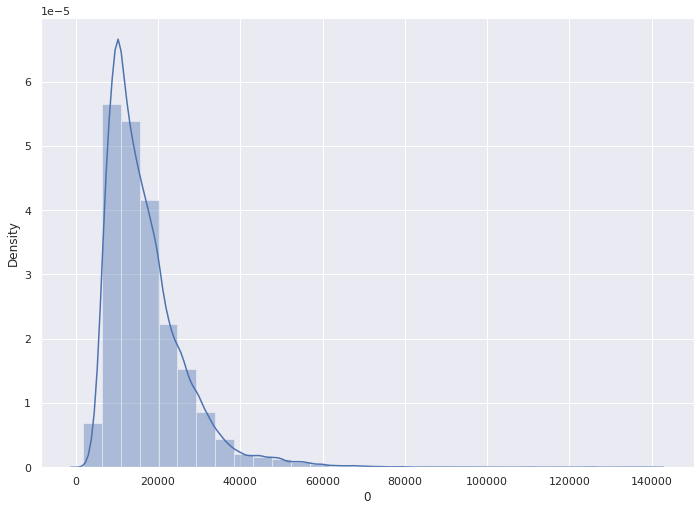

In [81]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(df4[0], bins=30) 
plt.show()

In [82]:
y2_std1 = scipy.stats.zscore(df3['price'])
y2_std1 = y2_std1.values.flatten()
y2_std1

array([-0.0438701 , -0.60588726, -0.01321462, ..., -0.96363672,
       -0.70817438, -0.88188878])

In [83]:
check_distribution(dist_names, y2_std1);


Distributions sorted by goodness of fit:
----------------------------------------
   Distribution  Distance        p_value D<p
3       lognorm  0.028158   7.825869e-64  no
5      pearson3  0.050914  8.393387e-208  no
2         gamma  0.050915  8.262274e-208  no
0          beta  0.140983   0.000000e+00  no
1         expon  0.240746   0.000000e+00  no
4          norm  0.115233   0.000000e+00  no
6             t  0.099368   0.000000e+00  no
7        triang  0.476131   0.000000e+00  no
8       uniform  0.716338   0.000000e+00  no
9   weibull_min  0.072039   0.000000e+00  no
10  weibull_max  0.063751   0.000000e+00  no


### Coluna 'model'

In [84]:
df3.head(3)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,brand
1,16,2016,16500,0,36203,0,20,64.2,2.0,0
2,12,2016,11000,1,29946,4,30,55.4,1.4,0
3,14,2017,16800,0,25952,0,145,67.3,2.0,0


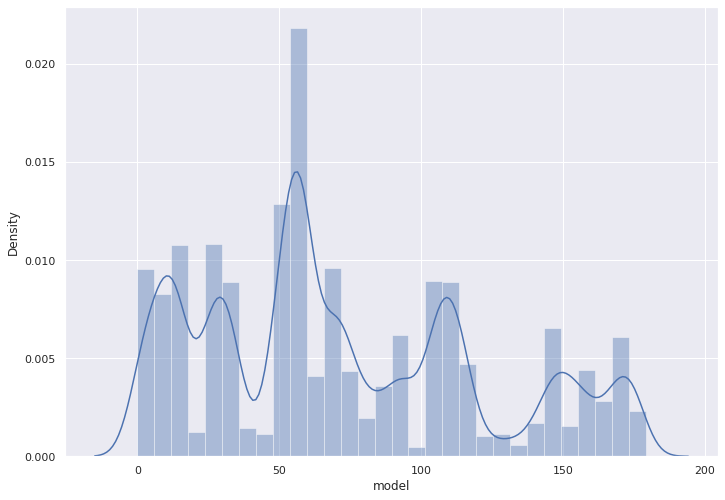

In [85]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(df3['model'], bins=30) 
plt.show()

In [86]:
y2_std2 = scipy.stats.zscore(df3['model'])
y2_std2 = y2_std2.values.flatten()
y2_std2

array([-1.12920699, -1.2102319 , -1.16971944, ..., -0.8456198 ,
       -0.27844544,  0.30898515])

In [87]:
check_distribution(dist_names, y2_std2);


Distributions sorted by goodness of fit:
----------------------------------------
   Distribution  Distance  p_value D<p
0          beta  0.214465      0.0  no
1         expon  0.186448      0.0  no
2         gamma  0.114898      0.0  no
3       lognorm  0.079562      0.0  no
4          norm  0.127613      0.0  no
5      pearson3  0.114902      0.0  no
6             t  0.127615      0.0  no
7        triang  0.115657      0.0  no
8       uniform  0.205860      0.0  no
9   weibull_min  0.096251      0.0  no
10  weibull_max  0.072780      0.0  no


### Coluna 'brand'

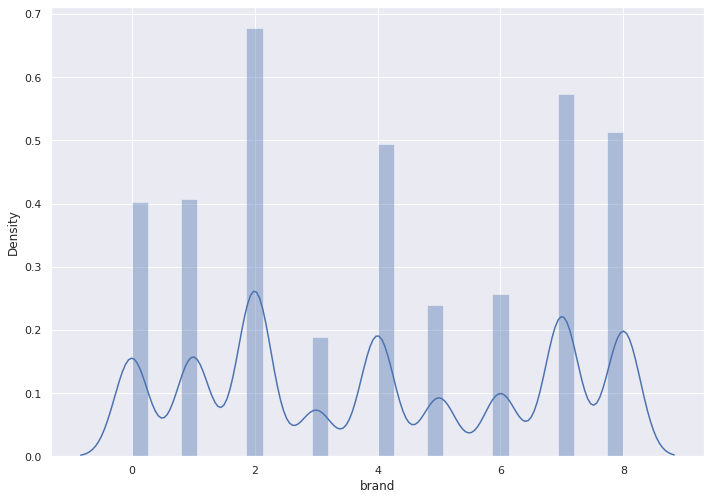

In [88]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(df3['brand'], bins=30) 
plt.show()

In [89]:
y2_std3 = scipy.stats.zscore(df3['model'])
y2_std3 = y2_std3.values.flatten()
y2_std3

array([-1.12920699, -1.2102319 , -1.16971944, ..., -0.8456198 ,
       -0.27844544,  0.30898515])

In [90]:
check_distribution(dist_names, y2_std3);


Distributions sorted by goodness of fit:
----------------------------------------
   Distribution  Distance  p_value D<p
0          beta  0.214465      0.0  no
1         expon  0.186448      0.0  no
2         gamma  0.114898      0.0  no
3       lognorm  0.079562      0.0  no
4          norm  0.127613      0.0  no
5      pearson3  0.114902      0.0  no
6             t  0.127615      0.0  no
7        triang  0.115657      0.0  no
8       uniform  0.205860      0.0  no
9   weibull_min  0.096251      0.0  no
10  weibull_max  0.072780      0.0  no


## 3 - Pré-processamento dos dados

In [91]:
X2 = df2.iloc[:, [0,1,3,4,5,6,7,8,9]]
y2 = df2.iloc[:, [2]]

In [92]:
# Separando os dados em 70% para treino e 30% para teste
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.30, random_state=42)

### Aplicando a opção escalar padrão para padronizar o conjunto de dados

#### Padronizando o conjunto de dados para transformar todas as variáveis na mesma ordem de grandeza.

In [93]:
# Padronizando X_train
scaler = StandardScaler()
scaler.fit(X_train)
X_train_pad = scaler.transform(X_train)

## 4 - Aplicação de modelos

### Modelo de DecisionTreeRegressor

#### Usando o gridSearch para escolher os melhores parâmetros para o modelo de Árvore de Decisão

In [97]:
# Criando um parâmetro grid
parameters = {'max_depth':[15, 20, 30],
              'min_samples_leaf':[2, 3, 7], 
              'min_samples_split':[10, 15, 20], 
              }

dtr = tree.DecisionTreeRegressor()

model_dtr = GridSearchCV(estimator=dtr, param_grid=parameters)
model_dtr.fit(X_train_pad, y_train)

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [15, 20, 30],
                         'min_samples_leaf': [2, 3, 7],
                         'min_samples_split': [10, 15, 20]})

In [98]:
# Melhores valores para os parâmetros do modelo de DecisionTreeRegressor
model_dtr.best_params_

{'max_depth': 30, 'min_samples_leaf': 2, 'min_samples_split': 15}

In [100]:
# Criando um modelo
dtr = tree.DecisionTreeRegressor(min_samples_leaf=2, min_samples_split=15, max_depth=30)
dtr.fit(X_train_pad, y_train);
y_pred_dt = dtr.predict(X_test)

### Avaliar modelo com as seguintes métricas

#### Vamos utilizar essas métricas porque elas são as mais indicadas para avaliar modelos de predição, 
#### porque essas métricas visam mostrar o quanto o modelo chegou perto de acertar o valor, 
#### quanto mais perto de 0, mais próximo o modelo chegou do valor real.

In [101]:
# Mean Absolute Error
mae_dtr = mean_absolute_error(y_test, y_pred_dt)
mae_dtr

8141.649286083756

In [102]:
# Mean Squared Error 
mse_dtr = mean_squared_error(y_test, y_pred_dt)
mse_dtr

105532769.47385624

In [103]:
# Root Mean Squared Error
rmse_dtr = mean_squared_error(y_test, y_pred_dt, squared=False)
rmse_dtr

10272.914361263616

In [104]:
# R2 (Coeficiente de Determinação)
r2_dtr = r2_score(y_test, y_pred_dt)
r2_dtr

-0.10205238729244437

### Modelo de Random Forest Regressor

In [105]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()

# Criando um parâmetro grid
parameters = {'min_samples_leaf':[2, 4, 6], 
              'min_samples_split':[2, 4, 8], 
              'max_depth':[15, 24, 30]}

model_rfr = GridSearchCV(estimator=rfr, param_grid=parameters)
model_rfr.fit(X_train_pad, y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [15, 24, 30],
                         'min_samples_leaf': [2, 4, 6],
                         'min_samples_split': [2, 4, 8]})

In [106]:
# Melhores valores para os parâmetros do modelo de RandomForestRegressor
model_rfr.best_params_

{'max_depth': 24, 'min_samples_leaf': 2, 'min_samples_split': 4}

In [108]:
#Instanciar Random Forest Regressor
rfr = RandomForestRegressor(min_samples_leaf=2, min_samples_split=4, max_depth=24, random_state=42) # n_estimators=40 (número de árvores)

# Treinar o modelo
rfr_model = rfr.fit(X_train_pad, y_train);

# Obter valores preditos
y_pred_rfr = rfr_model.predict(X_test)

In [109]:
# Avaliar modelo com as seguintes métricas

In [110]:
mae_rfr = mean_absolute_error(y_test, y_pred_rfr)
mae_rfr

10413.558148623348

In [111]:
mse_rfr = mean_squared_error(y_test, y_pred_rfr)
mse_rfr

146449318.9155074

In [112]:
rmse_rfr = mean_squared_error(y_test, y_pred_rfr, squared=False)
rmse_rfr

12101.624639506359

In [122]:
r2_rfr = r2_score(y_test, y_pred_rfr)
r2_rfr

-0.5293337067987207

### Modelo de Gradient Boosting Regressor

In [114]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(random_state=42)

In [115]:
#Instanciar Gradient Boosting Regressor
gbr = GradientBoostingRegressor(min_samples_leaf=4, min_samples_split=4, max_depth=24, random_state=42) 

# Treinar o modelo
gbr_model = gbr.fit(X_train_pad, y_train);

In [116]:
#Obter valores preditos
y_pred_gbr = gbr_model.predict(X_test)

In [117]:
# Avaliar modelo com as seguintes métricas

In [118]:
mae_gbr = mean_absolute_error(y_test, y_pred_gbr)
mae_gbr

9626.638926482257

In [119]:
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
mse_gbr

134741952.16748863

In [120]:
rmse_gbr = mean_squared_error(y_test, y_pred_gbr, squared=False)
rmse_gbr

11607.840116382058

In [123]:
r2_gbr = r2_score(y_test, y_pred_gbr)
r2_gbr

-0.4070765961601288

## 5 - Avaliação dos modelos

### Comparação dos resultados dos modelos

In [124]:
print('MAE Decision Tree Regressor:     ' + str(mae_dtr))
print('MAE Random Forest Regressor:     ' + str(mae_rfr))
print('MAE Gradient Boosting Regressor: ' + str(mae_gbr))
print(' ')
print('MSE Decision Tree Regressor:     ' + str(mse_dtr))
print('MSE Random Forest Regressor:     ' + str(mse_rfr))
print('MSE Gradient Boosting Regressor: ' + str(mse_gbr))
print(' ')
print('RMSE Decision Tree Regressor:     ' + str(rmse_dtr))
print('RMSE Random Forest Regressor:     ' + str(rmse_rfr))
print('RMSE Gradient Boosting Regressor: ' + str(rmse_gbr))
print(' ')
print('R2 Decision Tree Regressor:     ' + str(r2_dtr))
print('R2 Random Forest Regressor:     ' + str(r2_rfr))
print('R2 Gradient Boosting Regressor: ' + str(r2_gbr))

MAE Decision Tree Regressor:     8141.649286083756
MAE Random Forest Regressor:     10413.558148623348
MAE Gradient Boosting Regressor: 9626.638926482257
 
MSE Decision Tree Regressor:     105532769.47385624
MSE Random Forest Regressor:     146449318.9155074
MSE Gradient Boosting Regressor: 134741952.16748863
 
RMSE Decision Tree Regressor:     10272.914361263616
RMSE Random Forest Regressor:     12101.624639506359
RMSE Gradient Boosting Regressor: 11607.840116382058
 
R2 Decision Tree Regressor:     -0.10205238729244437
R2 Random Forest Regressor:     -0.5293337067987207
R2 Gradient Boosting Regressor: -0.4070765961601288


## Conclusão

Podemos concluir que o melhor modelo avaliado para predizer os preços dos carros foi o modelo que utiliza o algoritmo Decision Tree Regressor, pois obteve MAE, MSE, RMSE e R2 menores ou mais próximos de zero que os outros modelos. 

Para trabalhos futuros, pretendemos experimentar construir modelos com outros algoritmos a fim de conseguir erros menores ou mais próximos de zero para predizer com mais precisão os preços dos carros.